# Geopandas and Vector Data

-   We will be using Geopandas to work with our second type of data: vectors!
    -   A typical spatial workflow will involve both vectors and what we talked about last class(es): Rasters.

In [1]:
# Start with our basic imports

import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import geopandas as gpd
from pathlib import Path

### Setting up Geopandas and Data

-   For this lecture, we're going to use great open-source content from our textbook.

    -   This will even include getting data from the book site!
    -   Below, you will see that we reference a file on the internet. No need to download!

In [2]:
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
# For this chapter, some bespoke settings:
plt.style.use(
    {
        "axes.autolimit_mode": "data",
        "patch.linewidth": 0.2,
        "figure.figsize": (10, 8),
        "figure.dpi": 125,
    }
)

### What is a Geopandas dataframe

Quite literally, **GeoPandas** is a combination of geo and pandas so the good news is that everything you know about using **pandas** dataframes can be re-used here for geospatial data. The geo part adds functionality for geo-spatial data.

### Loading a vector file

-   First, we need some geo-spatial data to analyse.

-   There are several different file formats for geo-spatial data, such as Shapefile (.shp), GeoJSON/JSON, KML, and GeoPackage.

    -   Shapefiles used to be the standard way, but they were AWFUL.

        -   Dated methods, slow, proprietary, ESRI.

    -   The new standard (though not everyone has switched) is Geopackage (.gpkg) for most vector data applications.

### You should have downloaded countries_iso3.gpkg

![](images/paste-24.png)

In [3]:
# Set our paths like normal
data_directory = '../data'
vector_data_directory = os.path.join(data_directory, 'vector_data')
countries_vector_filename = 'countries_iso3.gpkg'
countries_vector_path = os.path.join(vector_data_directory, countries_vector_filename)

# Read the vector file off disk
gdf = gpd.read_file(countries_vector_path)

# Print the first three rows
gdf.head(3)

,id,iso3,nev_name,geometry
0,1,ABW,Aruba,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,2,AFG,Afghanistan,"MULTIPOLYGON (((74.54235 37.02167, 74.54742 37..."
2,3,AGO,Angola,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4..."


### What is a GeoDataFrame?

-   The tabular data is identical to a regular Dataframe, but it has that Geometry column
    -   Also a big difference is by being a GeoDataFrame, it has many other features, such as a CRS (coordinate reference system)
    -   The gdf object also has vector-specific algorithms attached to it
-   But first, let's look at it in QGIS

### Viewing a vector file in QGIS

-   Load `countries_iso3.gpkg` into QGIS

![](images/paste-25.png)

### Make it pretty with Symbology

-   Double click the countries_iso3 layer in the Layers view

    -   Then select the Symbology tab

```{=html}
<!-- -->
```
-   ![](images/paste-26.png)

-   There are tons of options, but I suggest the OutLine Blue.

-   ![](images/paste-27.png)

-   Can zoom and such

-   ![](images/paste-28.png)

### Polygons are connected to each row in the attribute table

-   Open the attribute table

    -   Right click on countries_iso3 in the layers tab

        -   Select Open Attribute Table

        -   ![](images/paste-30.png)

-   This should almost look like what we loaded in Python earlier!

    -   But now it's "missing" the geometry column

        -   It's not actually missing, it is just rendered spatially instead of being put in this table.

    -   Each row in the Attribute Table corresponds to one "Shape" within the Geometry column

        -   However, it will be a "Multipolygon" not a simple polygon because of non-contiguous shapes (e.g. islands)

![](images/paste-29.png)

### In-Class Exercise: Play around with Symbology

-   Try out the different symbology schemes to add a unique color to each country based on the value stored in the ID column.

    -   Hint, change the type of symbology (at the top) to categorized.

-   ![](images/paste-33.png)

-   ![](images/paste-34.png)

-   Just like with Rasters, you could spend a whole semester doing GIS work on Vectors using the menus in QGIS

    -   ![](images/paste-35.png)

-   But we're aiming higher!

    -   Let's do this all in Python

### Plotting with Geopandas

-   We've already loaded the gdf above, and we printed out the table

    -   But what about visualizing it in a more useful way

    -   Just like pandas, Geopandas has some built-in plotting functionality

<Axes: >

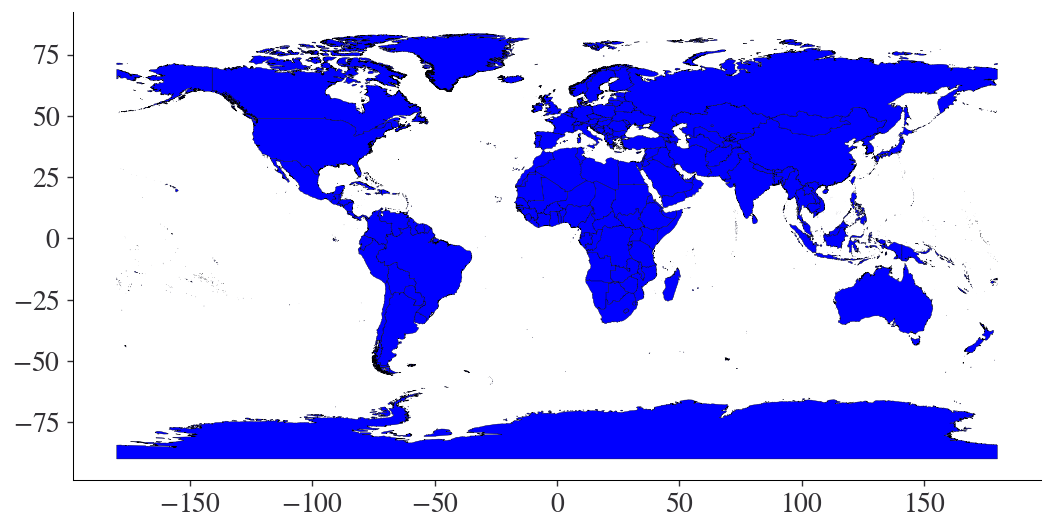

In [4]:
# Use matplotlib via Geopandas to plot the vector
gdf.plot(color="blue")

### Selecting subsets

- Suppose you want to just plot the USA
  - The magic of Geopandas is you can do it by selecting a subset, just like in Pandas

<Axes: >

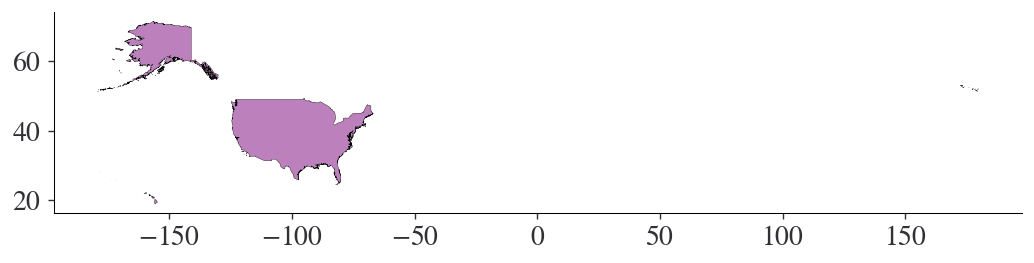

In [5]:
# Select the USA
usa = gdf[gdf["iso3"] == "USA"]
usa.plot()

### Spatial coordinate references

- Just like with Rasters, these have a CRS:
  - It is saved as an attribute on the GDF.

In [8]:
# Print the CRS
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Change the CRS

- Let's create a more advanced plot that illustrates the different projections we might use

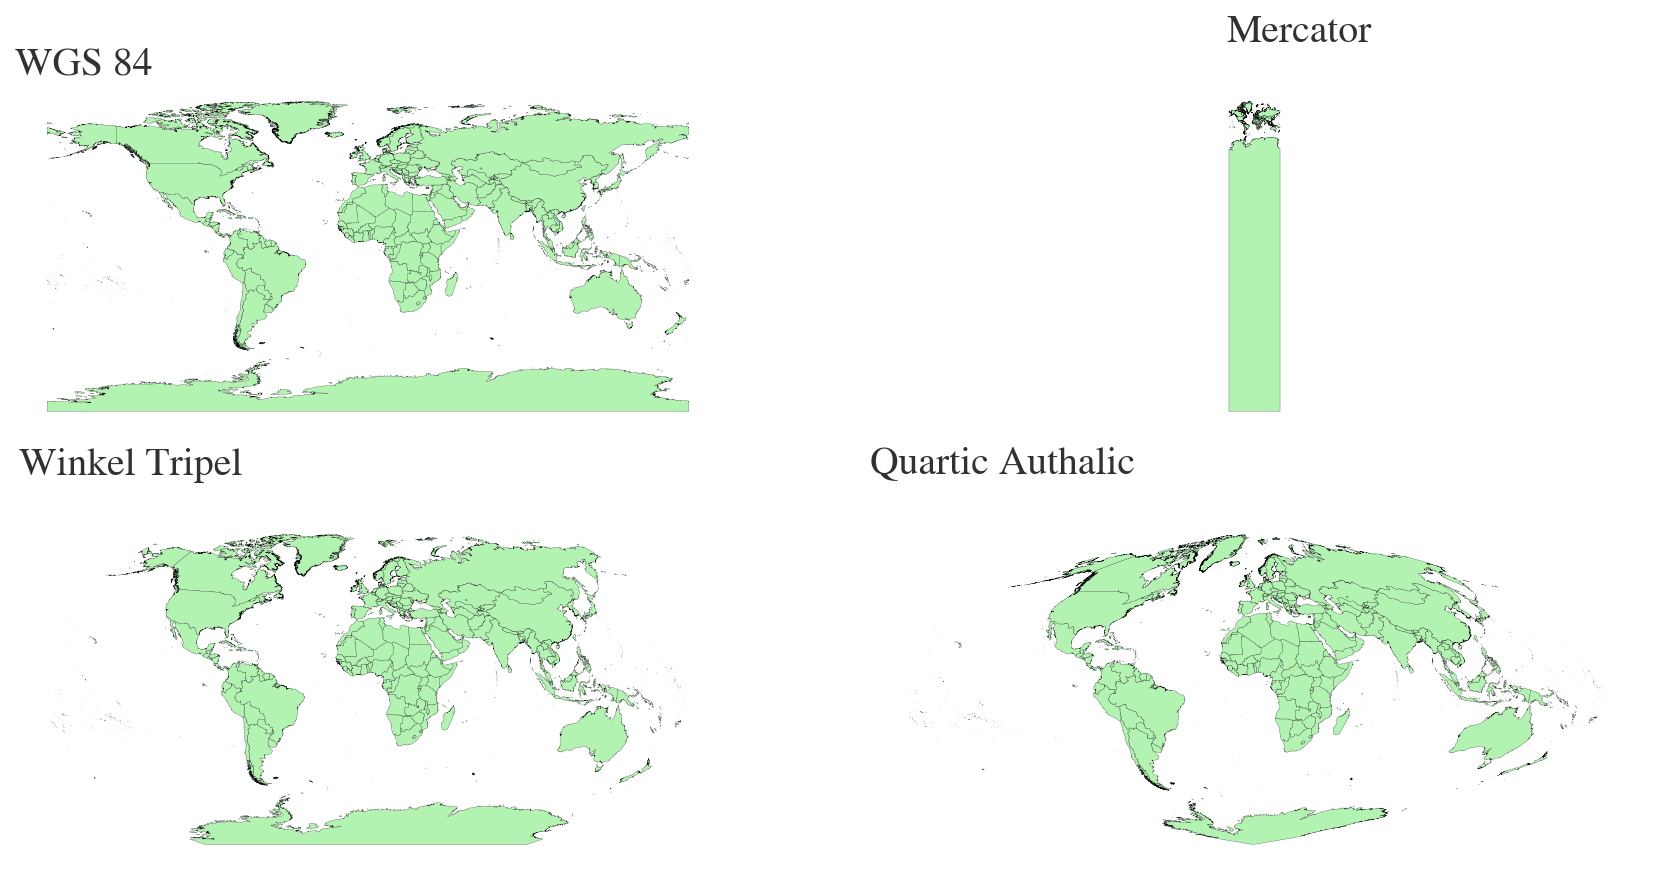

In [7]:
proj_names = ["WGS 84", "Mercator", "Winkel Tripel", "Quartic Authalic"]
crs_names = ["EPSG:4326", "EPSG:3395", "+proj=wintri", "+proj=qua_aut"]

fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(12, 6), dpi=150, sharex=False, sharey=False
)
for i, ax in enumerate(axes.flat):
    gdf.to_crs(crs_names[i]).plot(ax=ax, color="#b2f3b2", linewidth=0.1)
    ax.set_title(proj_names[i])
    ax.axis("off")
plt.tight_layout()
plt.show()

### Get the centroid

- For better or worse, almost all of "spatial economics" ignores vector data
  - Instead, if there is space involved, it uses the centroid of the polygon
  - This will be used for, e.g., calculating distance between a village and a forest
- We can get the centroids out of our GDF and plot them

In [ ]:
gdf["centroid"] = gdf.centroid

fig, ax = plt.subplots()
ax.axis("off")
gdf.boundary.plot(ax=ax, lw=0.2, color="k")
gdf["centroid"].plot(ax=ax, color="red", markersize=15)
plt.show()